# Project Description

In this project, create a model with time series data in the form of data about the value of Bitcoin, Ethereum and Litecoin in USD and the volume transacted of each currency between Jan-1-2020 and Apr-19-2021. There are more than 600000 rows of data for each bitcoin. For the model created, using the sequential model and the LSTM layer in the architecture.

# Preparation

In [ ]:
# lib. prep.
import csv
import tensorflow as tf
import numpy as np
import urllib
import pandas as pd
import matplotlib.pyplot as plt
! pip install -q kaggle
from google.colab import files
files.upload()

In [2]:
! mkdir ~/.kaggle
! mv ./kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d roopahegde/cryptocurrency-timeseries-2020
! unzip \*.zip  && rm *.zip

 62% 14.0M/22.7M [00:00<00:00, 147MB/s]
100% 22.7M/22.7M [00:00<00:00, 146MB/s]
Archive:  cryptocurrency-timeseries-2020.zip
  inflating: gemini_BTCUSD_2020_1min.csv  
  inflating: gemini_ETHUSD_2020_1min.csv  
  inflating: gemini_LTCUSD_2020_1min.csv  


In [3]:
data1 = pd.read_csv('/content/gemini_BTCUSD_2020_1min.csv')
print(data1.info())
data2 = pd.read_csv('/content/gemini_ETHUSD_2020_1min.csv')
print(data2.info())
data3 = pd.read_csv('/content/gemini_LTCUSD_2020_1min.csv')
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658065 entries, 0 to 658064
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unix Timestamp  658065 non-null  float64
 1   Date            658065 non-null  object 
 2   Symbol          658065 non-null  object 
 3   Open            658065 non-null  float64
 4   High            658065 non-null  float64
 5   Low             658065 non-null  float64
 6   Close           658065 non-null  float64
 7   Volume          658065 non-null  float64
dtypes: float64(6), object(2)
memory usage: 40.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658059 entries, 0 to 658058
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unix Timestamp  658059 non-null  float64
 1   Date            658059 non-null  object 
 2   Symbol          658059 non-null  object 
 3   Open            658059 non-

In [4]:
# check top-5 data
print(data1.head())
print(data2.head())
print(data3.head())

   Unix Timestamp             Date  Symbol  ...       Low     Close    Volume
0    1.618880e+12   4/20/2021 0:02  BTCUSD  ...  55541.69  55541.69  2.406734
1    1.618880e+12   4/20/2021 0:01  BTCUSD  ...  55711.74  55717.47  0.573458
2    1.618880e+12   4/20/2021 0:00  BTCUSD  ...  55691.79  55768.94  3.309904
3    1.618880e+12  4/19/2021 23:59  BTCUSD  ...  55677.92  55691.79  0.684934
4    1.618880e+12  4/19/2021 23:58  BTCUSD  ...  55773.08  55777.86  0.477225

[5 rows x 8 columns]
   Unix Timestamp             Date  Symbol  ...      Low    Close     Volume
0    1.618880e+12   4/20/2021 0:03  ETHUSD  ...  2154.38  2154.38   0.701288
1    1.618880e+12   4/20/2021 0:02  ETHUSD  ...  2155.88  2155.88  30.750737
2    1.618880e+12   4/20/2021 0:01  ETHUSD  ...  2168.63  2168.63  15.458851
3    1.618880e+12   4/20/2021 0:00  ETHUSD  ...  2162.69  2172.16  33.165910
4    1.618880e+12  4/19/2021 23:59  ETHUSD  ...  2162.36  2162.69  23.615627

[5 rows x 8 columns]
   Unix Timestamp         

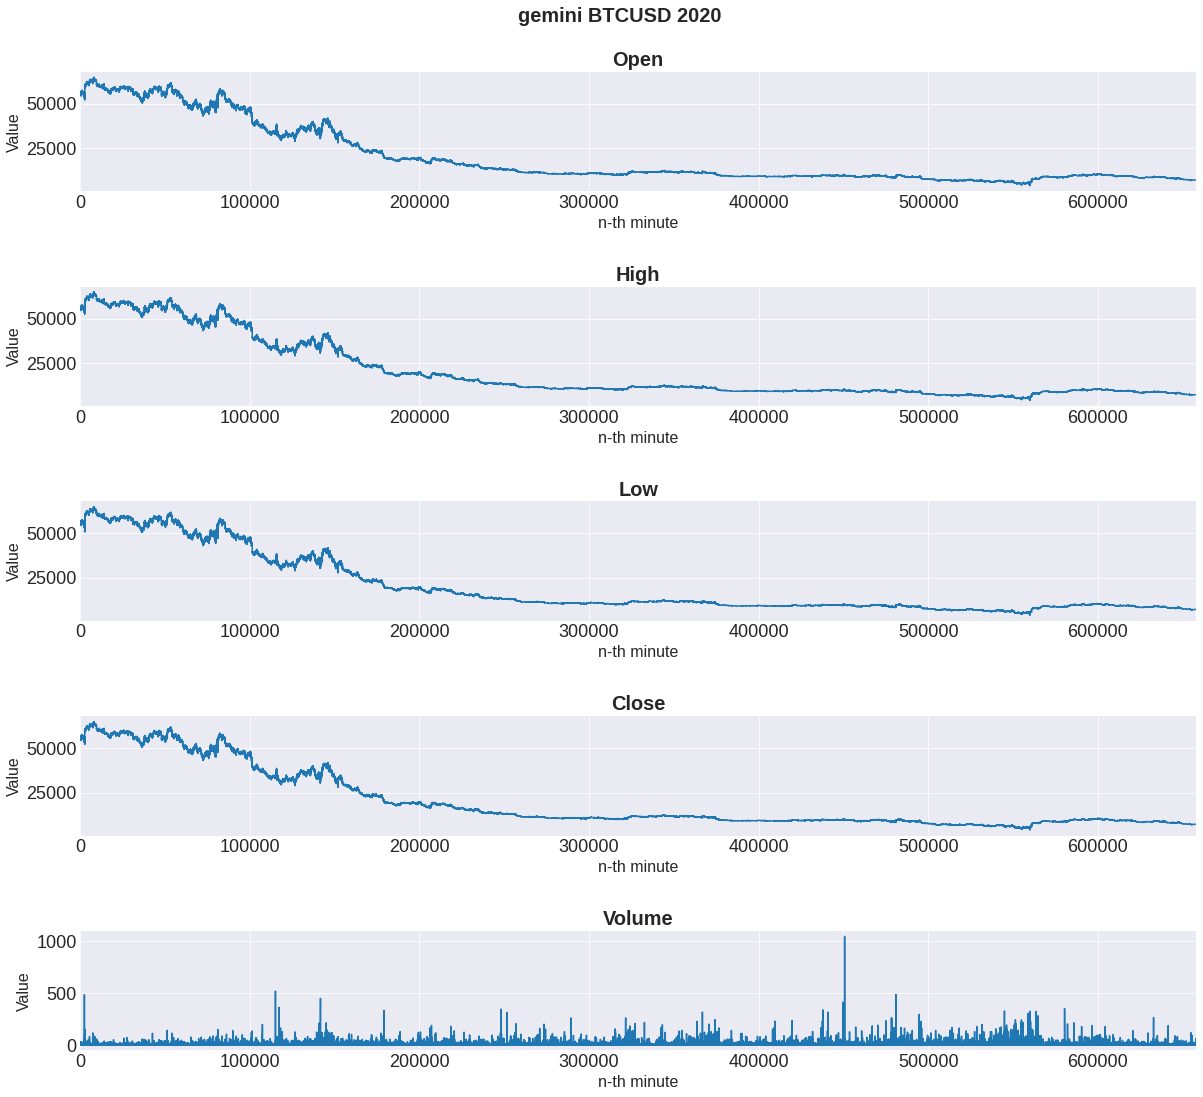

In [5]:
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(20,18))
plt.suptitle('gemini BTCUSD 2020', fontsize=20, fontweight='heavy', y=.93)
plt.subplots_adjust(hspace=.8)
for i, col in enumerate(data1.columns[3:]):
    plt.subplot(5,1,i+1)
    ax = data1[col].plot(kind='line')
    ax.set_title(col, fontsize=20, fontweight='bold')#, color='darkblue')
    ax.set_xlim(0, data1.shape[0])
    ax.set_xlabel('n-th minute', fontsize=16)
    ax.set_ylabel('Value', fontsize=16)

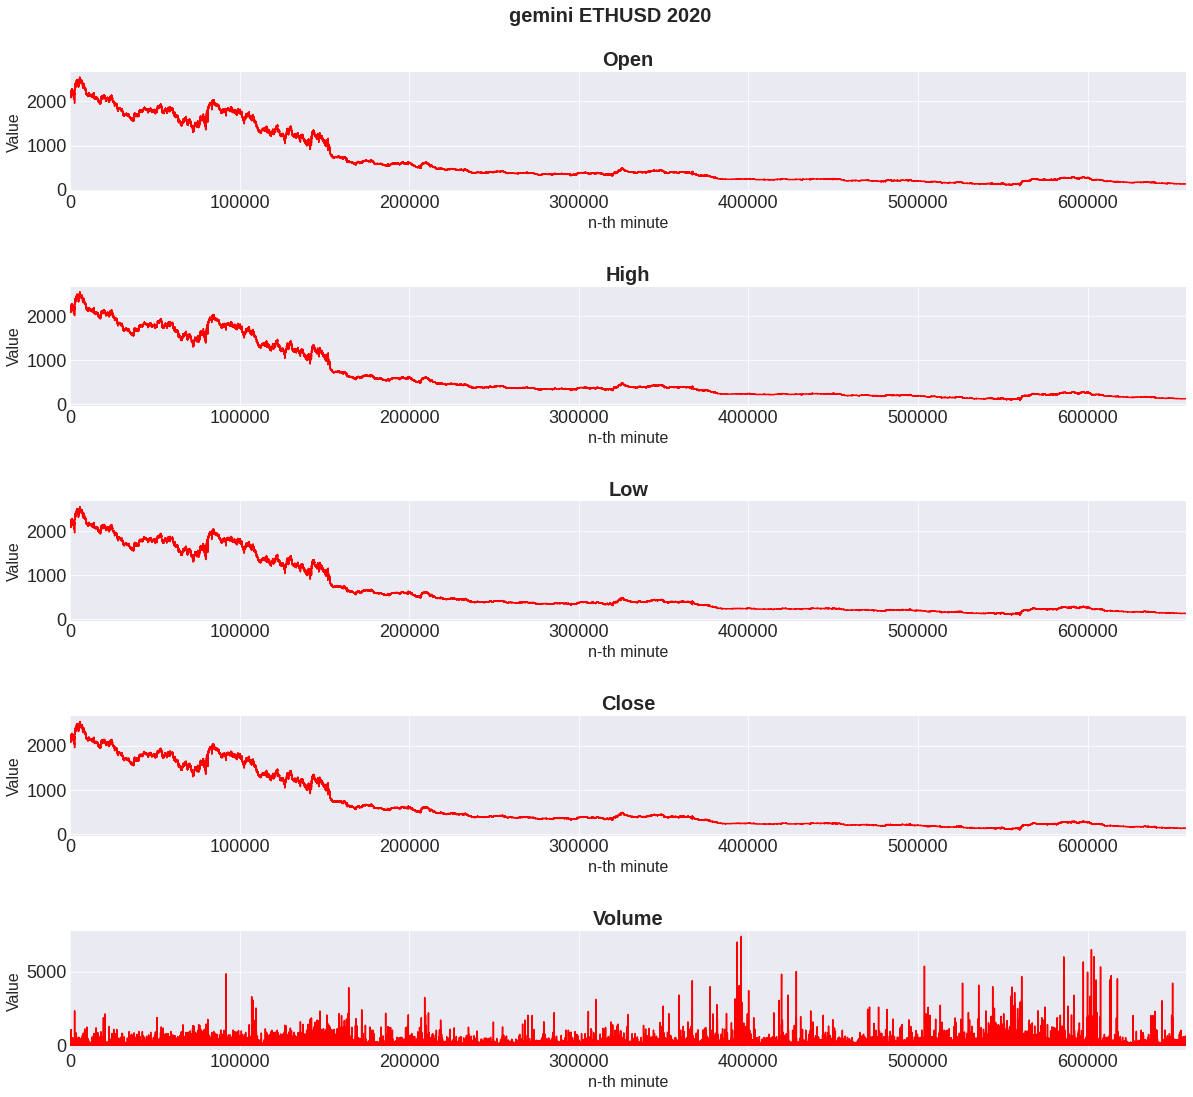

In [6]:
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(20,18))
plt.suptitle('gemini ETHUSD 2020', fontsize=20, fontweight='heavy', y=.93)
plt.subplots_adjust(hspace=.8)
for i, col in enumerate(data2.columns[3:]):
    plt.subplot(5,1,i+1)
    ax = data2[col].plot(kind='line', color='r')
    ax.set_title(col, fontsize=20, fontweight='bold')#, color='darkblue')
    ax.set_xlim(0, data2.shape[0])
    ax.set_xlabel('n-th minute', fontsize=16)
    ax.set_ylabel('Value', fontsize=16)

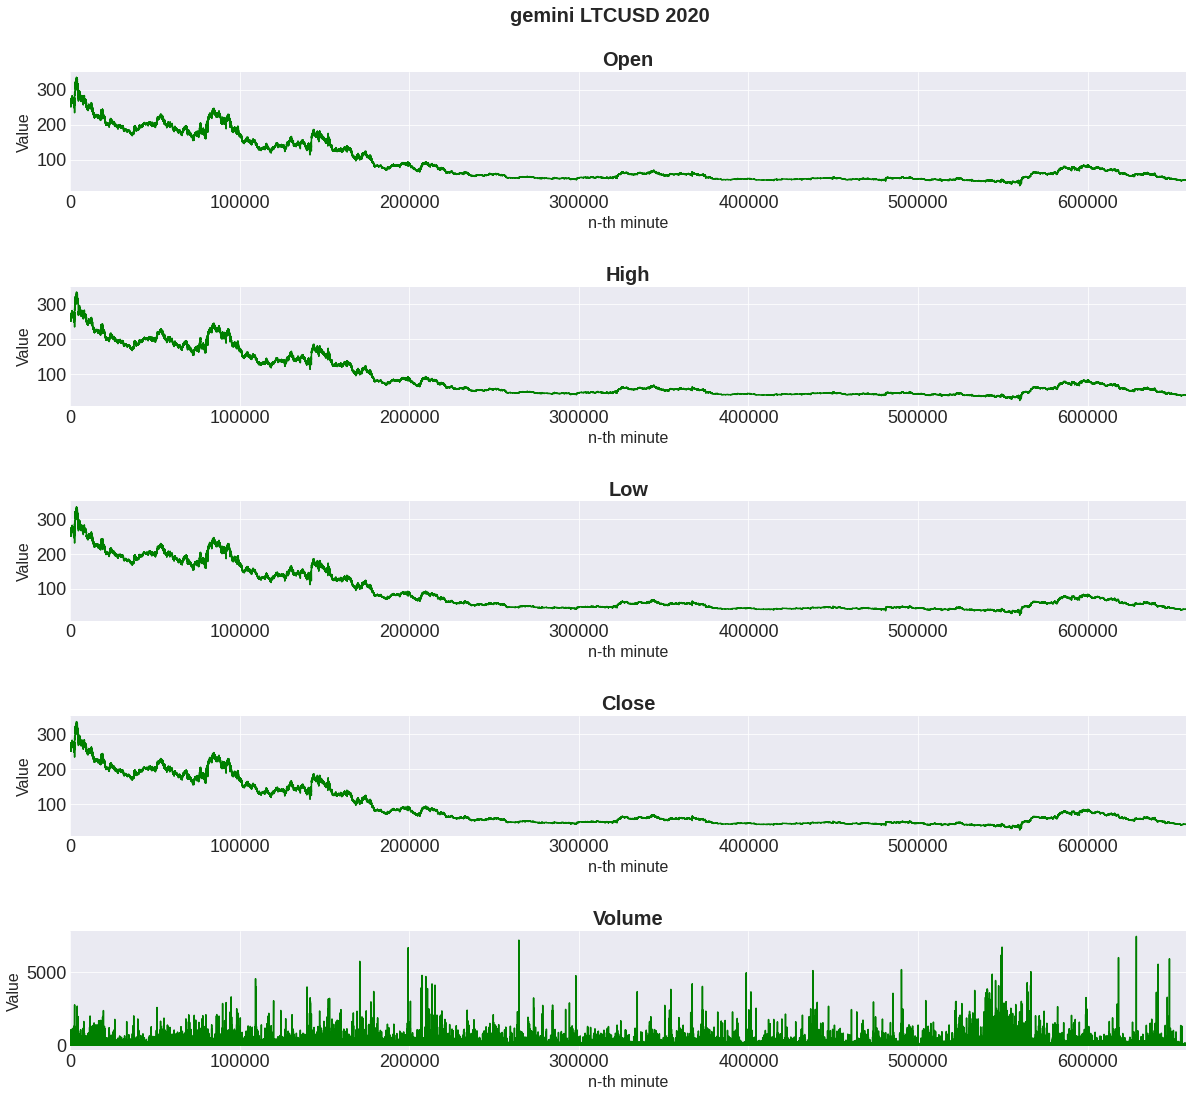

In [7]:
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(20,18))
plt.suptitle('gemini LTCUSD 2020', fontsize=20, fontweight='heavy', y=.93)
plt.subplots_adjust(hspace=.8)
for i, col in enumerate(data3.columns[3:]):
    plt.subplot(5,1,i+1)
    ax = data3[col].plot(kind='line', color='g')
    ax.set_title(col, fontsize=20, fontweight='bold')#, color='darkblue')
    ax.set_xlim(0, data3.shape[0])
    ax.set_xlabel('n-th minute', fontsize=16)
    ax.set_ylabel('Value', fontsize=16)

In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

open = data3['Open'].values
time_step = [i for i in range(len(open))]
series = np.array(open)

# Normalisasi data
min = np.min(series)
max = np.max(series)
series -= min
series /= max
time = np.array(time_step)

# Pembagian untuk spitting data
split_time = int(len(open)*0.8)

# Split data
time_train = time[:split_time] 
x_train = series[:split_time]
time_valid = time[split_time:] 
x_valid = series[split_time:]

window_size = 64
batch_size = 256
shuffle_buffer_size = 1000

train_set = windowed_dataset(x_train, window_size=window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
val_set = windowed_dataset(x_valid, window_size=window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)
print(x_train.shape, x_valid.shape)

(526408,) (131603,)


In [9]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae')<0.2 and logs.get('val_mae')<0.2:
            print('MAE & Val_MAE reach < 0.2 ...')
            self.model.stop_training = True

model = tf.keras.models.Sequential([    
            tf.keras.layers.Conv1D(filters=128, kernel_size=5,
                            strides=1, padding='causal',
                            activation='relu',
                            input_shape=[None, 1]),
            tf.keras.layers.MaxPooling1D(3),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1)
    ], name='CNNBi-LSTM')

model.summary()

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
            optimizer=optimizer,
            metrics=['mae'])

Model: "SimpleConvBi-LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 128)         768       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 128)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 42,645
Trainable params: 42,645
Non-trainable params: 0
_____________________________________________

In [10]:
history = model.fit(train_set, 
                    validation_data=val_set,
                    epochs=25, 
                    callbacks=[myCallback()],
                    )

Epoch 1/25
2057/2057 [==============================] - 320s 154ms/step - loss: 0.0228 - mae: 0.1480 - val_loss: 8.5970e-04 - val_mae: 0.0352
MAE & Val_MAE reach < 0.2 ...


(0.0, 0.05500000000000001)

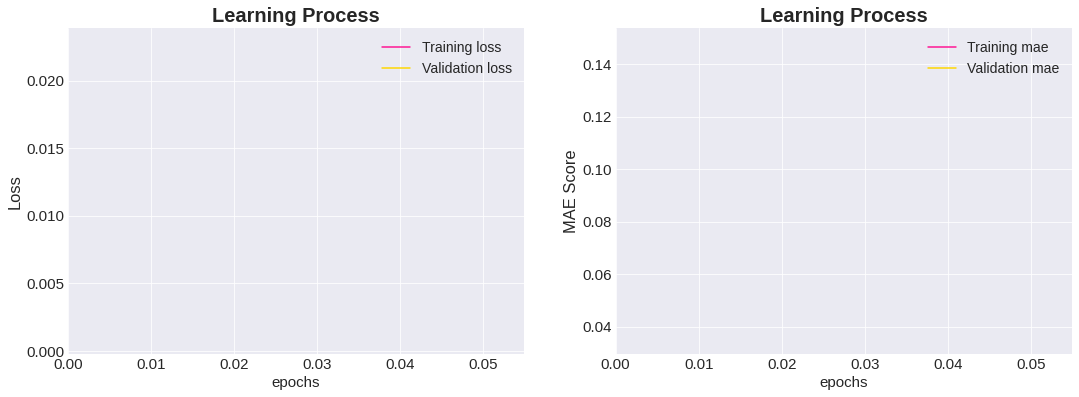

In [11]:
plt.style.use('seaborn-darkgrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(history.history['loss'], color='deeppink', label='Training loss')
axs[0].plot(history.history['val_loss'], color='gold', label='Validation loss')    
axs[0].set_title('Learning Process', fontsize=20, fontweight='heavy')
axs[0].set_xlabel('epochs', fontsize=15)
axs[0].set_ylabel('Loss', fontsize=16.5)
axs[0].tick_params(axis='both', labelsize=15)
axs[0].legend(loc='best', shadow=True, prop={'size': 14})
axs[0].set_xlim(left=0)
axs[1].plot(history.history['mae'], color='deeppink', label='Training mae')
axs[1].plot(history.history['val_mae'], color='gold', label='Validation mae')
axs[1].set_title('Learning Process', fontsize=20, fontweight='heavy')
axs[1].set_xlabel('epochs', fontsize=15)
axs[1].set_ylabel('MAE Score', fontsize=16.5)
axs[1].tick_params(axis='both', labelsize=15)
axs[1].legend(loc='best', shadow=True, prop={'size': 14})
axs[1].set_xlim(left=0)